# Analyses d'un carrousel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

In [2]:
from carrouselsAnalysis import data

In [3]:
# on utilise le style graphique de Seaborn
sns.set_theme()

In [4]:
# Mapping interstations pour Lille = mapping par défaut de get_movement_data

#intersecteurs = ['HDV1-PDB1', 'PDB2-HDV2', 'MAR1-FIV1', 'FIV2-MAR2',
#                 'RIH1-REP1', 'REP2-RIH2', 'REP1-GAM1', 'GAM2-REP2']
#terminus = ['CAL1', '4C2']
#retournements = ['CALOV1', '4CEV2']
#
#mapping = {'intersecteurs': intersecteurs,
#                    'terminus': terminus,
#                    'retournements': retournements}

In [5]:
#import carrouselsAnalysis

## Import des données

In [7]:
from carrouselsAnalysis.data import get_movement_data, get_EB_data

In [8]:
# chemin des données à importer en local
chemin_data = './data/FIVP/Lille_FLUENCE_DATA-FIVP-2022-09-16__v2.xlsx'
# source des données. Typiquement 'FIVP' ou 'Site'
source = 'FIVP'
# contexte du carrousel. Typiquement 'mono-train' ou 'multi-trains'
contexte = 'multi-trains'
# référence du build utilisé (si non officiel, sinon la SoftwareVersion est extraite de l'OMAP)
# build = None

In [9]:
mouvements = get_movement_data(chemin_data, source=source, context=contexte)

18066 mouvements importés


In [10]:
data_EB = get_EB_data(chemin_data, source=source, context=contexte)

42 EB en mouvement importés


## Précision d'arrêt par station

In [11]:
from carrouselsAnalysis.graphs import trace_precision_station, trace_dispersion_station

### Précision moyenne

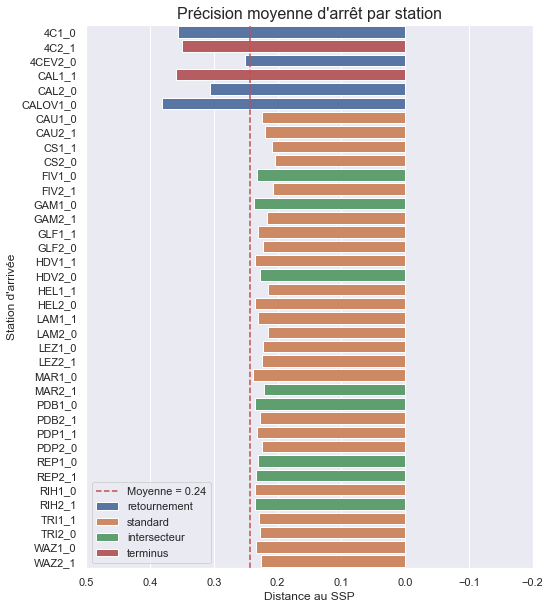

In [12]:
trace_precision_station(mouvements, xlim=(0.5,-0.2), color='tab:blue')

### Dispersion des arrêts par station

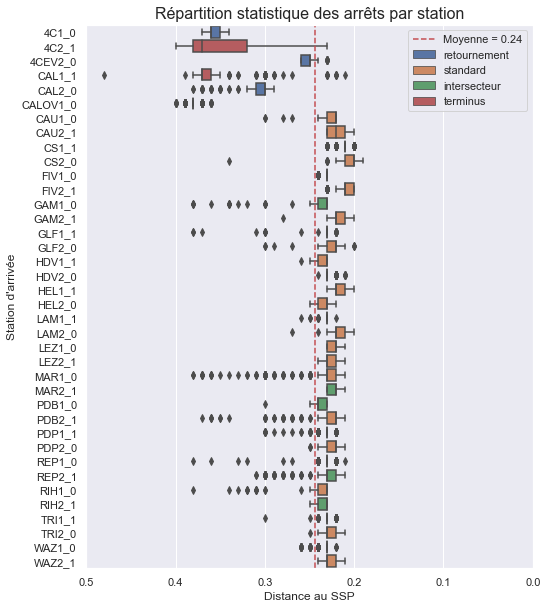

In [13]:
trace_dispersion_station(mouvements)

## Précision d'arrêt par train

In [14]:
from carrouselsAnalysis.graphs import trace_precision_train, trace_dispersion_train

### Précision moyenne par train

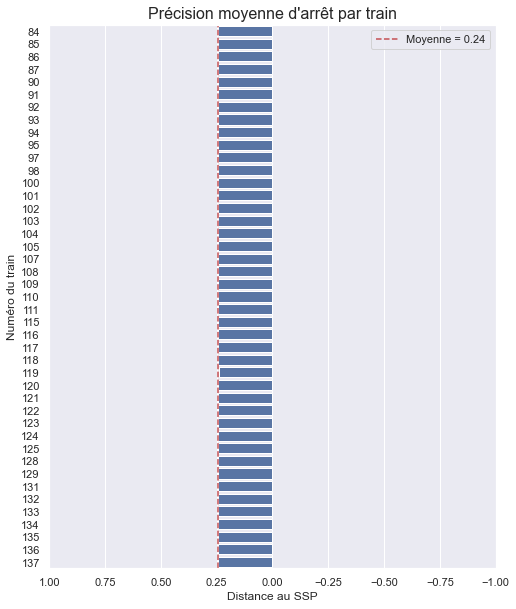

In [15]:
trace_precision_train(mouvements, color='b')

### Dispersion par train

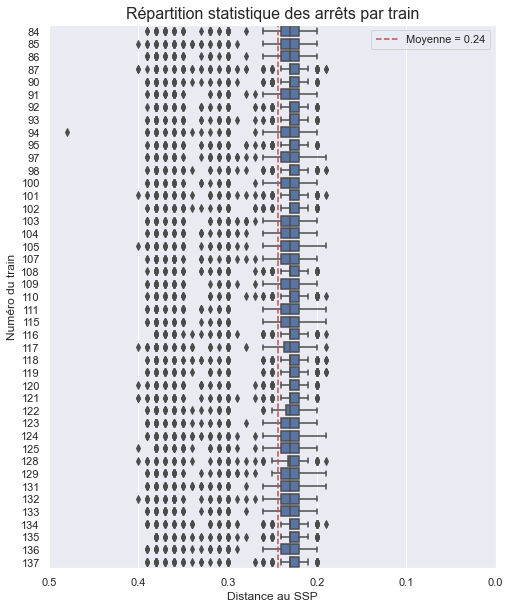

In [16]:
trace_dispersion_train(mouvements, color='b')

## Temps de parcours

In [17]:
from carrouselsAnalysis.graphs import trace_tps_parcours, trace_disp_tps_parcours

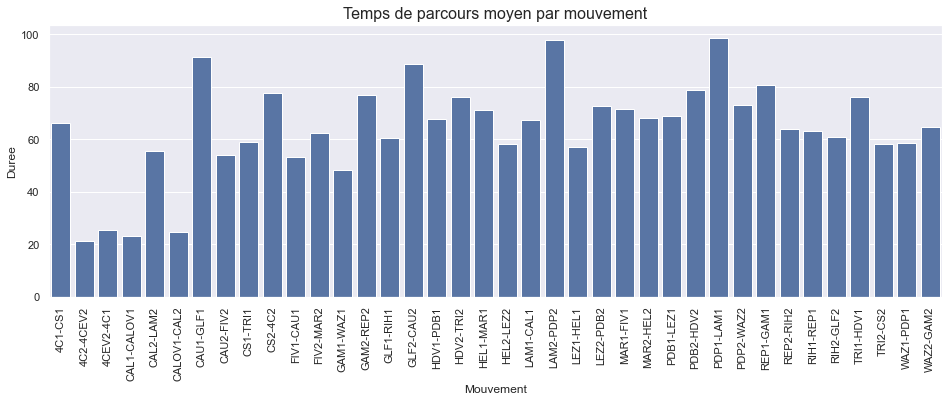

In [18]:
trace_tps_parcours(mouvements, color='b', category=None)

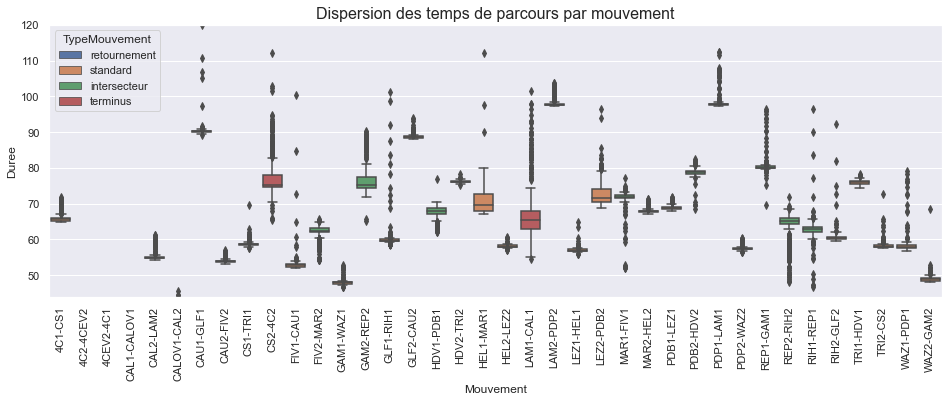

In [19]:
trace_disp_tps_parcours(mouvements, ylim=(44, 120))

## Temps de parcours comparés mono-train vs multi-trains

## Vitesse commerciale

### Vitesse commerciale moyenne par voie

### Vitesse commerciale avec les temps de parcours mini

## Freinages d'urgence

### Répartition des freinages d'urgence par mouvement

#### y compris par type de mouvement

### Répartition des freinages d'urgence par KP

In [20]:
from carrouselsAnalysis.graphs import trace_EB_by_KP, trace_EB_by_time

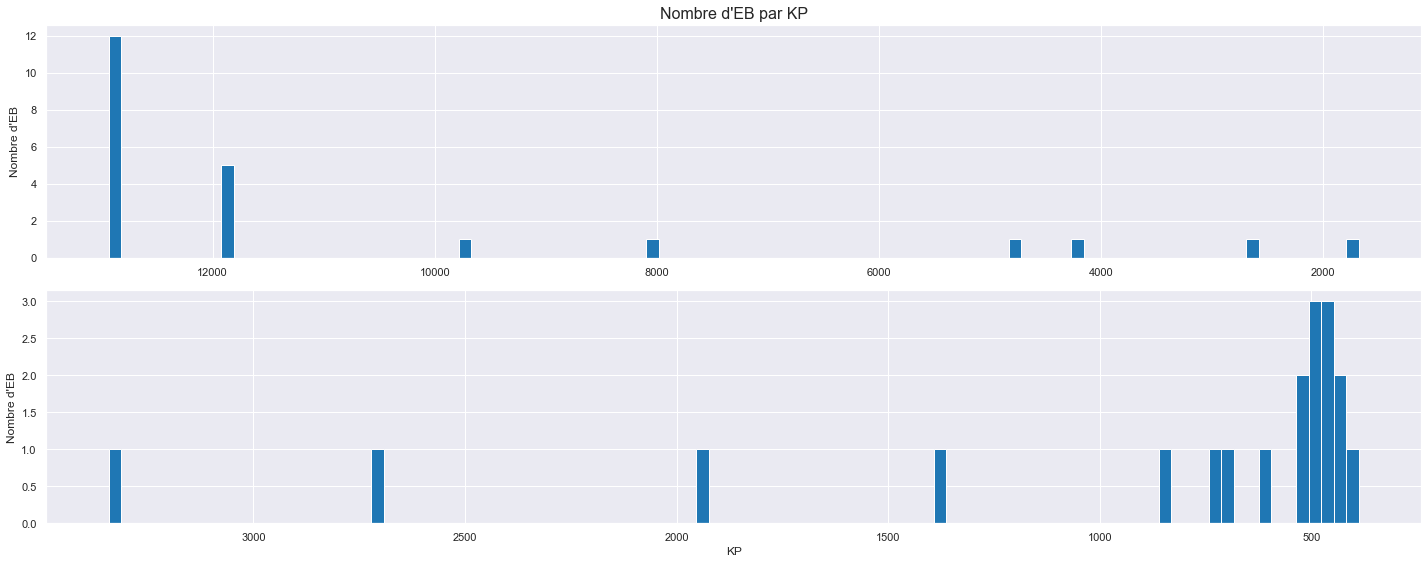

In [21]:
trace_EB_by_KP(data_EB)

### Répartition des freinages d'urgence dans le temps

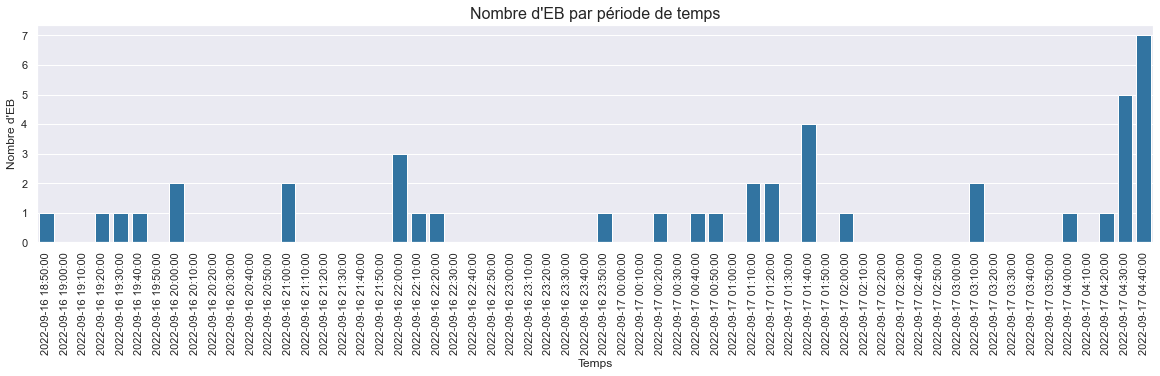

In [22]:
trace_EB_by_time(data_EB, bins='10T')

### Répartition des freinages d'urgence par cause d'EB

## Corrélations

### Corrélation entre nombre de FU par interstation et écart entre temps de parcours moyen et mini

In [ ]:
mean_accuracy_by_station_total = pd.concat([mean_accuracy_by_station, mean_accuracy_by_station_b70])
mean_accuracy_by_station_total

In [ ]:
fig = plt.figure(figsize=(8,10))

sns.barplot(data=mean_accuracy_by_station_total, y='Stop_Station', x='Dist_SSP', hue='Beta', orient='h')
plt.title("Précision moyenne d'arrêt par station")
plt.xticks(rotation=90)
plt.xlim(1,-1)
plt.axvline(mean_accuracy_by_station['Dist_SSP'].mean(), color='r', ls='--', label='Moyenne')
plt.legend(title='Beta')
plt.xlabel('Distance au SSP')
plt.ylabel("Station d'arrivée")
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,16))

sns.boxplot(x='Distance_from_train_front_end_to_stop_wished', y=data_B63['Stop_Station'], data=data_B63,
            color='darkred')
plt.xlabel("Distance au point d'arrêt visé")
plt.title("Répartition statistique des arrêts par station de fin de mouvement")
plt.ylabel("Station")
plt.xlim(0.5,0)
plt.axvline(data_B64['Distance_from_train_front_end_to_stop_wished'].mean(), color='r', alpha=0.7, ls='--', label='Moyenne')
plt.legend()
_ = plt.xticks(rotation = 90)

In [ ]:
fig = plt.figure(figsize=(8,16))

sns.boxplot(x='Distance_from_train_front_end_to_stop_wished', y=data_B64['Stop_Station'], hue='Version', data=data_B64)
plt.xlabel("Distance au point d'arrêt visé")
plt.title("Répartition statistique des arrêts par station de fin de mouvement")
plt.ylabel("Station")
plt.xlim(0.5,0)
plt.axvline(data_B64['Distance_from_train_front_end_to_stop_wished'].mean(), color='r', alpha=0.7, ls='--', label='Moyenne')
plt.legend()
_ = plt.xticks(rotation = 90)


In [ ]:
fig = plt.figure(figsize=(8,16))

sns.boxplot(x='Distance_from_train_front_end_to_stop_wished', y=data['Stop_Station'], hue='Version', data=data)
plt.xlabel("Distance au point d'arrêt visé")
plt.title("Répartition statistique des arrêts par station de fin de mouvement")
plt.ylabel("Station")
plt.xlim(0.5,0)
plt.axvline(data['Distance_from_train_front_end_to_stop_wished'].mean(), color='r', alpha=0.7, ls='--', label='Moyenne')
plt.legend()
_ = plt.xticks(rotation = 90)


## Temps de parcours

In [ ]:
running_times_FIVP = data_B64[data_B64['Duree_MVT'] < 200].groupby('mouvement')['Duree_MVT'].mean().reset_index()
running_times_FIVP['Version'] = '137b64_multi'

fig = plt.figure(figsize=(16,4))

sns.barplot(data=running_times_FIVP, x='mouvement', y='Duree_MVT', color='tab:blue')
plt.title("Temps de parcours moyen")
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))

sns.boxplot(x='mouvement', y='Duree_MVT', data=data_B64)
plt.xlabel("mouvement")
plt.title("Répartition statistique des temps de parcours par mouvement")
plt.ylabel("Temps de parcours")
plt.legend()
plt.ylim(0,110)
_ = plt.xticks(rotation = 90)

In [ ]:
data_RC4 = pd.read_excel('../LOT3_RC4/Lille_FLUENCE_DATA-2022-09-12__lot3__RC4.xlsx')
data_RC4.dropna()
# Define new column for mvt from mvt start to mvt stop
data_RC4['mouvement'] = data_RC4['Start_Station'].str[:-2] + '-' + data_RC4['Stop_Station'].str[:-2]
data_RC4['mouvement'].value_counts()

In [ ]:
fig = plt.figure(figsize=(16,16))
sns.barplot(data=data_RC4, y='mouvement', x='Duree_MVT', hue='NumTrain', orient='h')

In [ ]:
data_RC4 = data_RC4[data_RC4['Duree_MVT'] < 150]

In [ ]:
running_times_RC4 = data_RC4.groupby('mouvement')['Duree_MVT'].mean().reset_index()
running_times_RC4['Version'] = 'Site_Lot3_RC4'

In [ ]:
running_times = pd.concat([running_times_FIVP, running_times_RC4])
running_times

In [ ]:
fig = plt.figure(figsize=(16,4))

sns.barplot(data=running_times, x='mouvement', y='Duree_MVT', hue='Source')
plt.title("Temps de parcours moyen")
plt.xticks(rotation=90)
plt.show()

In [ ]:
delta_running_times = running_times_RC4.merge(running_times_FIVP, on='mouvement', left_index=True)
delta_running_times['delta'] = delta_running_times['Duree_MVT_y'] - delta_running_times['Duree_MVT_x']
delta_running_times = delta_running_times[['mouvement', 'delta']]

In [ ]:
delta_running_times = delta_running_times[delta_running_times['delta'] > -50]

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.barplot(data=delta_running_times, x='mouvement', y='delta', color='tab:blue',
           label=f"gain moyen par station: {delta_running_times['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre ATO Lot 3 RC4 sur site et FIVP 137B64",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.set_style()
sns.barplot(data=delta_running_times, x='mouvement', y='delta', hue='type_interstation', dodge=False)
plt.title("Écart moyen de temps de parcours entre ATO Lot 3 RC4 (mono-train) sur site et FIVP (40 trains) 137B64",
         size=16)
plt.xticks(rotation=90)
plt.ylabel('Delta temps de parcours')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
delta_running_times_standard = delta_running_times[delta_running_times['type_interstation'] == 'Standard']
sns.barplot(data=delta_running_times_standard, x='mouvement', y='delta', color='tab:blue',
           label=f"gain moyen par station: {delta_running_times_standard['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre ATO Lot 3 RC4 (mono-train) sur site et FIVP 137B64 sur les interstation standard",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
tps_parcours = pd.read_excel('./tps_parcours_RC3_RC4.xlsx')
tps_parcours_137b64 = tps_parcours[['mouvement', '1.3.7.BETA64']].rename(columns={'1.3.7.BETA64': 'duree'})
tps_parcours_137b64['Version'] = '137b64_mono'

In [ ]:
fig = plt.figure(figsize=(16,16))
sns.barplot(data=tps_parcours_137b64, y='mouvement', x='duree', color='tab:blue', orient='h')

In [ ]:
running_times_FIVP = running_times_FIVP.rename(columns={'Duree_MVT': 'duree'})
running_times = pd.concat([running_times_FIVP, tps_parcours_137b64])
running_times[running_times['mouvement'] == "HEL1-MAR1"]

In [ ]:
fig = plt.figure(figsize=(16,4))

sns.barplot(data=running_times, x='mouvement', y='duree', hue='Version')
plt.title("Temps de parcours comparés mono vs multi trains en FIVP 137b64")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [ ]:
delta_running_times = tps_parcours_137b64.merge(running_times_FIVP, on='mouvement', left_index=True)
delta_running_times['delta'] = delta_running_times['duree_y'] - delta_running_times['duree_x']
delta_running_times = delta_running_times[['mouvement', 'delta']]

In [ ]:
# delta_running_times = delta_running_times[delta_running_times['delta'] > -50]

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.barplot(data=delta_running_times, x='mouvement', y='delta', color='tab:blue',
           label=f"gain moyen par station: {delta_running_times['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre mono train et multi trains FIVP 137b64",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.set_style()
sns.barplot(data=delta_running_times, x='mouvement', y='delta', hue='type_interstation', dodge=False)
plt.title("Écart moyen de temps de parcours entre mono train et multi trains FIVP 137b64",
         size=16)
plt.xticks(rotation=90)
plt.ylabel('Delta temps de parcours')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
delta_running_times_standard = delta_running_times[delta_running_times['type_interstation'] == 'Standard']
sns.barplot(data=delta_running_times_standard, x='mouvement', y='delta', color='tab:blue',
           label=f"perte moyenne par station: {delta_running_times_standard['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre mono train et multi trains FIVP 137b64 sur les interstation standard",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()